In [1]:
#import libraries 

# Step 1: Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [2]:
#Load The Dataset

df = pd.read_csv('StudentsPerformance.csv')

# Display the first few rows
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
#Basic Information

print("Shape of dataset:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nNull Values:\n", df.isnull().sum())


Shape of dataset: (1000, 8)

Column Names: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']

Data Types:
 gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

Null Values:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


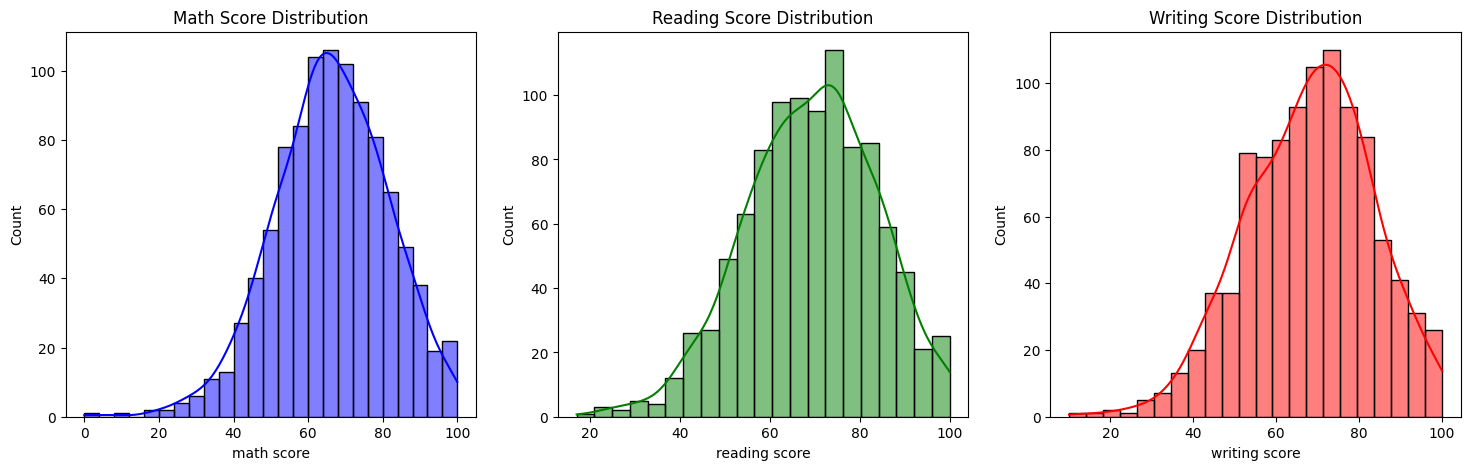

In [4]:
#Exploratory Data Analysis (EDA)

# Step 4: Basic Descriptive Statistics
df.describe()

# Plotting distribution of scores
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.histplot(df['math score'], kde=True, color='blue')
plt.title('Math Score Distribution')

plt.subplot(1,3,2)
sns.histplot(df['reading score'], kde=True, color='green')
plt.title('Reading Score Distribution')

plt.subplot(1,3,3)
sns.histplot(df['writing score'], kde=True, color='red')
plt.title('Writing Score Distribution')

plt.show()


In [5]:
#Data Preprocessing


le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [6]:
#Feature Selection and Train-Test Split

X = df.drop(['math score'], axis=1)  # Features
y = df['math score']                 # Target

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)


Training Features Shape: (800, 7)
Testing Features Shape: (200, 7)


In [8]:
# Model Building

# Model 1 - Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Prediction
y_pred_lr = lr_model.predict(X_test)

# Model 2 - Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Prediction
y_pred_rf = rf_model.predict(X_test)

In [9]:
# Model Evaluation

def evaluate_model(y_true, y_pred, model_name):
    print(f"------ {model_name} ------")
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE):", mean_squared_error(y_true, y_pred))
    print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2 Score:", r2_score(y_true, y_pred))
    print("\n")

# Evaluate both models
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")



------ Linear Regression ------
Mean Absolute Error (MAE): 4.130145078004054
Mean Squared Error (MSE): 28.275284506327317
Root Mean Squared Error (RMSE): 5.317450940660131
R2 Score: 0.8838026201112225


------ Random Forest Regressor ------
Mean Absolute Error (MAE): 4.70082380952381
Mean Squared Error (MSE): 36.79422162429139
Root Mean Squared Error (RMSE): 6.065824068029948
R2 Score: 0.8487940184356789




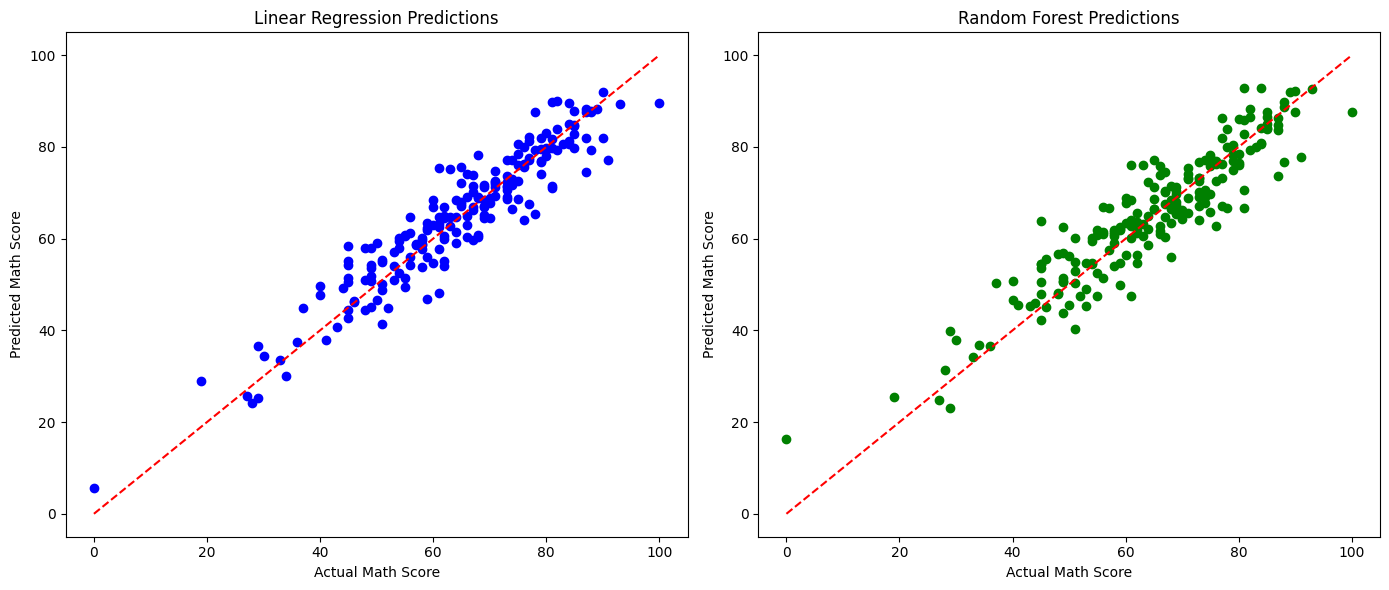

In [10]:
# Result Visualization (Graphical Comparison)

# Plotting actual vs predicted
plt.figure(figsize=(14,6))

# Linear Regression
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_lr, color='blue')
plt.plot([0, 100], [0, 100], '--r')
plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')
plt.title('Linear Regression Predictions')

# Random Forest
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_rf, color='green')
plt.plot([0, 100], [0, 100], '--r')
plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')
plt.title('Random Forest Predictions')

plt.tight_layout()
plt.show()


In [11]:
# Analytical Conclusion

# Step 10: Comparing both models
lr_r2 = r2_score(y_test, y_pred_lr)
rf_r2 = r2_score(y_test, y_pred_rf)

if rf_r2 > lr_r2:
    print("Random Forest Model performed better for predicting Math Scores!")
else:
    print("Linear Regression Model performed better for predicting Math Scores!")


Linear Regression Model performed better for predicting Math Scores!
